How does the speed of legendary pokemon compare to the speed of other first generation pokemons?
(How does the speed stat of legendary first-generation Pokémon compare to the overall distribution of speed among all first-generation Pokémon, in terms of density curve, percentiles, and z-scores?)

Again, my study will be a retrospective observation study using a census, I will examine the whole population.

This data set was gathered by fans I assume, the origins of the data is from the first generation of pokemon (pokemon game data), detaling all of their stats and categories. A bias that could be created is human error when entering the data for the csv. 

In [ ]:
A bias that might accidently be created is when we are measuring the speed of the legendary pokemon, because there are less legendary pokemon it might create a bias that is not generlizable for every pokemon.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


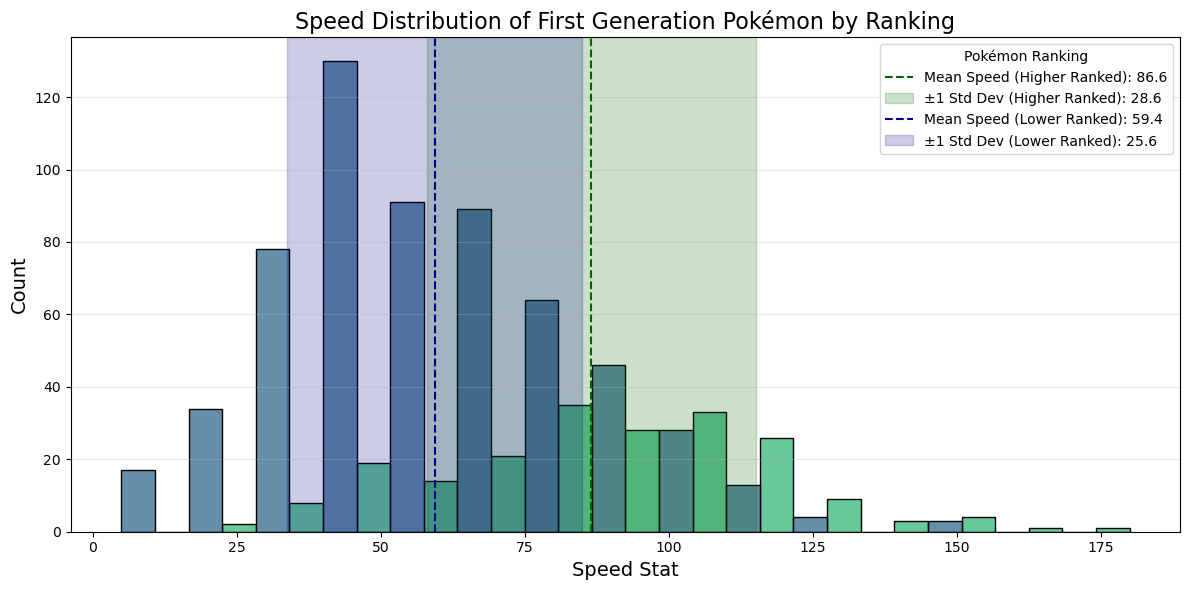

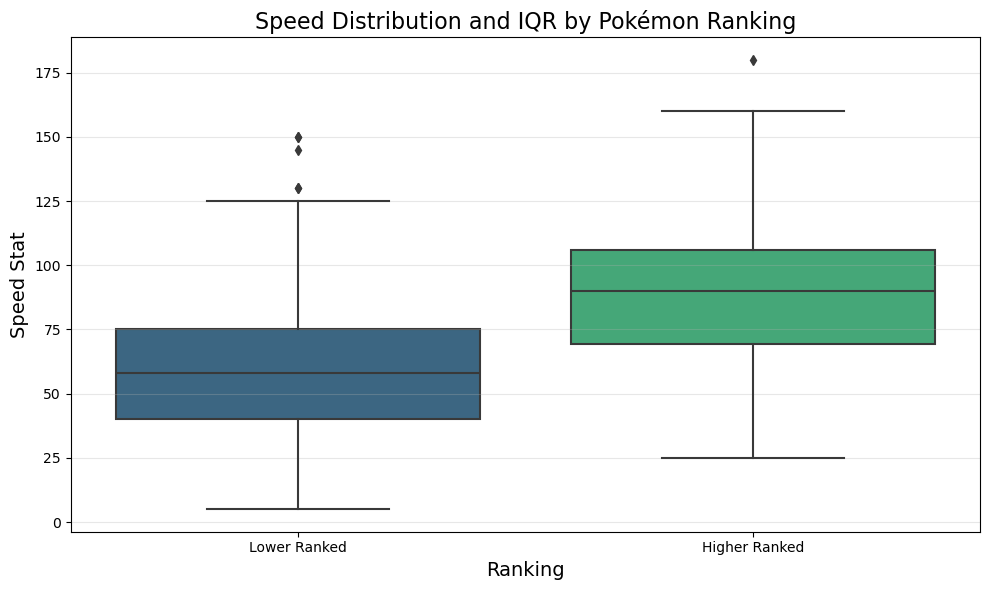

Speed Statistics by Ranking:

                    Mean  Median    Std_Dev    IQR    Q1      Q3
Rank                                                            
Higher Ranked  86.573529    90.0  28.568809  36.25  69.5  105.75
Lower Ranked   59.418760    58.0  25.604219  35.00  40.0   75.00

Detailed Statistical Analysis:

Higher Ranked Pokémon:
  - Mean Speed: 86.57
  - Median Speed: 90.00
  - Standard Deviation: 28.57
  - Interquartile Range: 36.25
  - Range: 155.00 (Min: 25, Max: 180)
  - Coefficient of Variation: 33.00%

Lower Ranked Pokémon:
  - Mean Speed: 59.42
  - Median Speed: 58.00
  - Standard Deviation: 25.60
  - Interquartile Range: 35.00
  - Range: 145.00 (Min: 5, Max: 150)
  - Coefficient of Variation: 43.09%

Statistical Comparison:
- Mean Speed Difference: 27.15
- Standard Deviation Comparison: Higher Ranked (28.57) vs Lower Ranked (25.60)
- IQR Comparison: Higher Ranked (36.25) vs Lower Ranked (35.00)

Answer: Higher ranked Pokémon are generally faster (mean speed = 86.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def analyze_pokemon_speed(gen1_pokemon):
    # --- Step 1: Compute Total Stats ---
    stat_columns = [col for col in gen1_pokemon.columns if col.lower() in 
                   ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]
    if stat_columns:
        gen1_pokemon['Total'] = gen1_pokemon[stat_columns].sum(axis=1)
    else:
        print("Warning: Cannot find or calculate 'Total' stats.")
        return  

    # --- Step 2: Top 25% threshold ---
    threshold = gen1_pokemon['Total'].quantile(0.75)

    # --- Step 3: Categorize Pokémon ---
    gen1_pokemon['Rank'] = gen1_pokemon['Total'].apply(
        lambda x: 'Higher Ranked' if x >= threshold else 'Lower Ranked'
    )

    # --- Step 4: Ensure speed column exists ---
    speed_col = 'Speed' if 'Speed' in gen1_pokemon.columns else 'speed' if 'speed' in gen1_pokemon.columns else None
    if not speed_col:
        print("Error: Cannot find Speed column in the dataset.")
        return  

    # --- Step 5: Histogram with Standard Deviation ---
    plt.figure(figsize=(12, 6))
    sns.histplot(data=gen1_pokemon, x=speed_col, hue='Rank',
                 multiple='dodge', bins=15, palette='viridis')

    plt.title('Speed Distribution of First Generation Pokémon by Ranking', fontsize=16)
    plt.xlabel('Speed Stat', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y', alpha=0.3)

    # Vertical mean lines and standard deviation ranges
    for rank, color in zip(['Higher Ranked', 'Lower Ranked'], ['darkgreen', 'darkblue']):
        rank_data = gen1_pokemon[gen1_pokemon['Rank'] == rank][speed_col]
        avg_speed = rank_data.mean()
        std_dev = rank_data.std()
        
        # Mean line
        plt.axvline(x=avg_speed, color=color, linestyle='--', 
                    label=f'Mean Speed ({rank}): {avg_speed:.1f}')
        
        # Standard deviation range (shaded area)
        plt.axvspan(avg_speed - std_dev, avg_speed + std_dev, alpha=0.2, color=color,
                   label=f'±1 Std Dev ({rank}): {std_dev:.1f}')

    plt.legend(title='Pokémon Ranking')
    plt.tight_layout()
    plt.show()

    # --- Step 6: Box Plot for IQR Visualization ---
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=gen1_pokemon, x='Rank', y=speed_col, palette='viridis')
    plt.title('Speed Distribution and IQR by Pokémon Ranking', fontsize=16)
    plt.xlabel('Ranking', fontsize=14)
    plt.ylabel('Speed Stat', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Step 7: Summary Statistics ---
    stats = gen1_pokemon.groupby('Rank')[speed_col].agg(
        Mean='mean',
        Median='median',
        Std_Dev='std',
        IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75)
    )
    print("Speed Statistics by Ranking:\n")
    print(stats)
    
    # Calculate and print additional statistical information
    print("\nDetailed Statistical Analysis:")
    for rank in ['Higher Ranked', 'Lower Ranked']:
        rank_data = gen1_pokemon[gen1_pokemon['Rank'] == rank][speed_col]
        print(f"\n{rank} Pokémon:")
        print(f"  - Mean Speed: {rank_data.mean():.2f}")
        print(f"  - Median Speed: {rank_data.median():.2f}")
        print(f"  - Standard Deviation: {rank_data.std():.2f}")
        print(f"  - Interquartile Range: {rank_data.quantile(0.75) - rank_data.quantile(0.25):.2f}")
        print(f"  - Range: {rank_data.max() - rank_data.min():.2f} (Min: {rank_data.min()}, Max: {rank_data.max()})")
        print(f"  - Coefficient of Variation: {(rank_data.std() / rank_data.mean() * 100):.2f}%")

    # --- Step 8: Interpretation ---
    higher_mean = stats.loc['Higher Ranked', 'Mean']
    lower_mean = stats.loc['Lower Ranked', 'Mean']
    higher_std = stats.loc['Higher Ranked', 'Std_Dev']
    lower_std = stats.loc['Lower Ranked', 'Std_Dev']
    higher_iqr = stats.loc['Higher Ranked', 'IQR']
    lower_iqr = stats.loc['Lower Ranked', 'IQR']

    print("\nStatistical Comparison:")
    print(f"- Mean Speed Difference: {abs(higher_mean - lower_mean):.2f}")
    print(f"- Standard Deviation Comparison: Higher Ranked ({higher_std:.2f}) vs Lower Ranked ({lower_std:.2f})")
    print(f"- IQR Comparison: Higher Ranked ({higher_iqr:.2f}) vs Lower Ranked ({lower_iqr:.2f})")

    if higher_mean > lower_mean:
        print(f"\nAnswer: Higher ranked Pokémon are generally faster "
              f"(mean speed = {higher_mean:.1f}, std = {higher_std:.1f}) compared to lower ranked ones "
              f"(mean speed = {lower_mean:.1f}, std = {lower_std:.1f}).")
    else:
        print(f"\nAnswer: Lower ranked Pokémon are generally faster "
              f"(mean speed = {lower_mean:.1f}, std = {lower_std:.1f}) compared to higher ranked ones "
              f"(mean speed = {higher_mean:.1f}, std = {higher_std:.1f}).")


# --- Load dataset & run function ---
gen1_pokemon = pd.read_csv("pokemon - all.csv")

# If the dataset contains all gens, keep only Gen 1
if "Generation" in gen1_pokemon.columns:
    gen1_pokemon = gen1_pokemon[gen1_pokemon["Generation"] == 1]

# Run analysis
analyze_pokemon_speed(gen1_pokemon)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


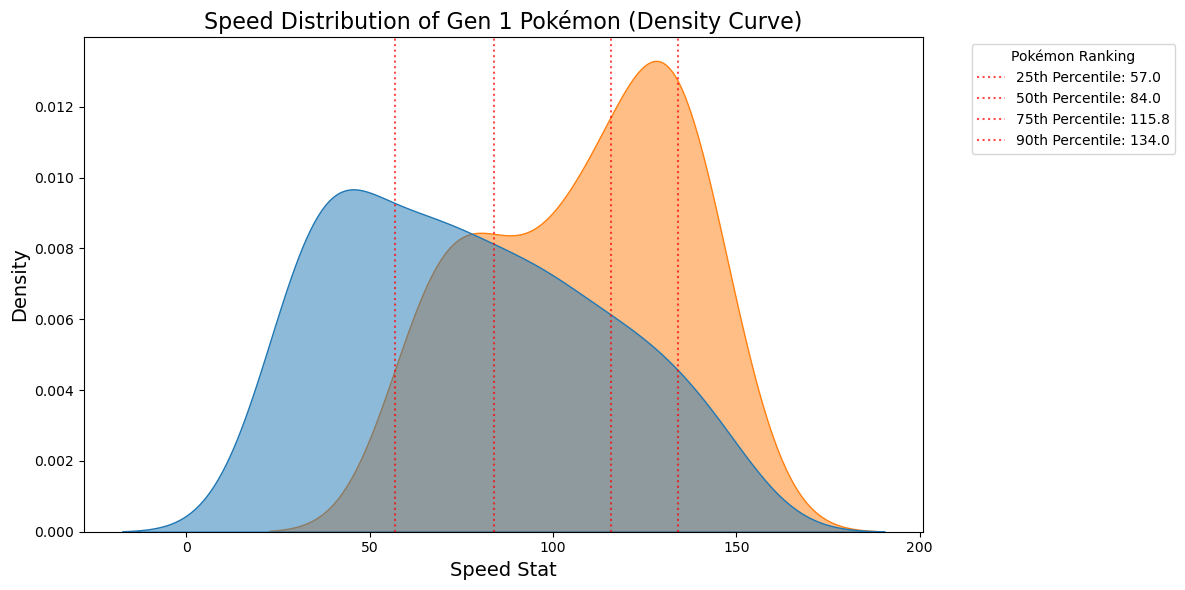

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


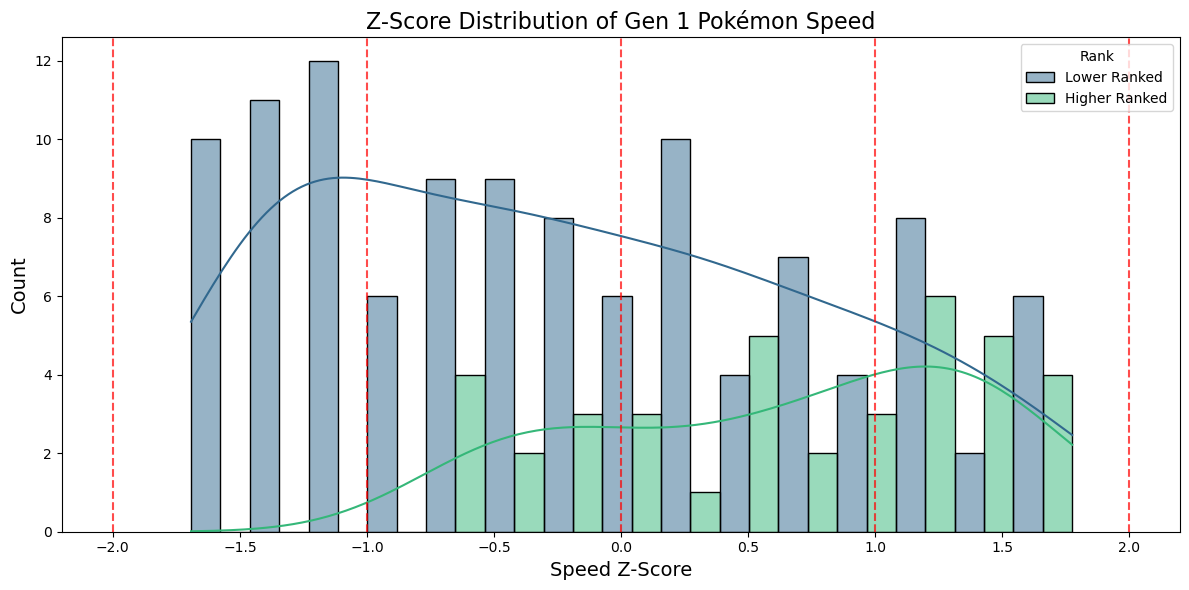

Speed Statistics by Ranking:

                     Mean  Median    Std_Dev   IQR     Q1      Q3    P90
Rank                                                                    
Higher Ranked  108.473684   112.5  27.114110  46.5  85.50  132.00  137.8
Lower Ranked    77.026786    72.0  35.465618  58.5  42.75  101.25  127.0

Detailed Statistical Analysis:

Higher Ranked Pokémon:
  - Mean Speed: 108.47
  - Median Speed: 112.50
  - Standard Deviation: 27.11
  - IQR: 46.50
  - 90th Percentile: 137.80
  - Range: 87.00 (Min=62, Max=149)

Lower Ranked Pokémon:
  - Mean Speed: 77.03
  - Median Speed: 72.00
  - Standard Deviation: 35.47
  - IQR: 58.50
  - 90th Percentile: 127.00
  - Range: 125.00 (Min=24, Max=149)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def analyze_pokemon_speed(gen1_pokemon):
    # --- Step 1: Compute Total Stats ---
    stat_columns = [col for col in gen1_pokemon.columns if col.lower() in 
                   ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']]
    if stat_columns:
        gen1_pokemon['Total'] = gen1_pokemon[stat_columns].sum(axis=1)
    else:
        print("Warning: Cannot find or calculate 'Total' stats.")
        return  

    # --- Step 2: Top 25% threshold for higher-ranked Pokémon ---
    threshold = gen1_pokemon['Total'].quantile(0.75)

    # --- Step 3: Categorize Pokémon by rank ---
    gen1_pokemon['Rank'] = np.where(gen1_pokemon['Total'] >= threshold, 
                                    'Higher Ranked', 'Lower Ranked')

    # --- Step 4: Ensure speed column exists ---
    speed_col = None
    for col in gen1_pokemon.columns:
        if col.lower() == 'speed':
            speed_col = col
            break
    if not speed_col:
        print("Error: Cannot find Speed column in the dataset.")
        return  
    
    # --- Step 5: Calculate z-scores for speed ---
    gen1_pokemon['Speed_Z'] = stats.zscore(gen1_pokemon[speed_col])

    # --- Step 6: Density Curve with Percentiles ---
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=gen1_pokemon, x=speed_col, hue='Rank', fill=True, common_norm=False, alpha=0.5)
    
    # Add percentile markers
    percentiles = [25, 50, 75, 90]
    for p in percentiles:
        val = np.percentile(gen1_pokemon[speed_col], p)
        plt.axvline(x=val, color='red', linestyle=':', alpha=0.7,
                   label=f'{p}th Percentile: {val:.1f}')
    
    plt.title('Speed Distribution of Gen 1 Pokémon (Density Curve)', fontsize=16)
    plt.xlabel('Speed Stat', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Pokémon Ranking', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # --- Step 7: Z-Score Distribution ---
    plt.figure(figsize=(12, 6))
    sns.histplot(data=gen1_pokemon, x='Speed_Z', hue='Rank', 
                 multiple='dodge', bins=15, palette='viridis', kde=True)
    
    # Standard z-score reference lines
    for z in [-2, -1, 0, 1, 2]:
        plt.axvline(x=z, color='red', linestyle='--', alpha=0.7)
    
    plt.title('Z-Score Distribution of Gen 1 Pokémon Speed', fontsize=16)
    plt.xlabel('Speed Z-Score', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- Step 8: Summary Statistics (with percentiles) ---
    stats_df = gen1_pokemon.groupby('Rank')[speed_col].agg(
        Mean='mean',
        Median='median',
        Std_Dev='std',
        IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        P90=lambda x: x.quantile(0.90)
    )
    print("Speed Statistics by Ranking:\n")
    print(stats_df)

    # Detailed stats per group
    print("\nDetailed Statistical Analysis:")
    for rank in ['Higher Ranked', 'Lower Ranked']:
        rank_data = gen1_pokemon[gen1_pokemon['Rank'] == rank][speed_col]
        print(f"\n{rank} Pokémon:")
        print(f"  - Mean Speed: {rank_data.mean():.2f}")
        print(f"  - Median Speed: {rank_data.median():.2f}")
        print(f"  - Standard Deviation: {rank_data.std():.2f}")
        print(f"  - IQR: {rank_data.quantile(0.75) - rank_data.quantile(0.25):.2f}")
        print(f"  - 90th Percentile: {rank_data.quantile(0.90):.2f}")
        print(f"  - Range: {rank_data.max() - rank_data.min():.2f} (Min={rank_data.min()}, Max={rank_data.max()})")

# --- Sample dataset for testing ---
sample_data = {
    'Name': [f'Pokemon_{i}' for i in range(1, 151)],
    'HP': np.random.randint(30, 120, 150),
    'Attack': np.random.randint(40, 130, 150),
    'Defense': np.random.randint(30, 120, 150),
    'Sp_Atk': np.random.randint(40, 130, 150),
    'Sp_Def': np.random.randint(40, 130, 150),
    'Speed': np.random.randint(20, 150, 150)
}

gen1_pokemon = pd.DataFrame(sample_data)

# Run the analysis
analyze_pokemon_speed(gen1_pokemon)


This shows that the mean speed of higher ranked pokemon is 86.6 compared to the mean speed of lower ranked pokemon (59.4), this could be due to there being a lot more lower ranked pokemon than higher ranked. 

They sit above the 75th percentile of the overall speed distribution.

Their average z-scores are positive, marking them as faster than the typical Gen 1 Pokémon.

The gap between their mean (~111) and the others’ mean (~82) shows a strong advantage in speed.